In [1]:
# compatibility Python 2 & 3
from __future__ import (absolute_import, division, print_function, unicode_literals)

import warnings
warnings.simplefilter('ignore')
# show graphviz in jupyter
%pylab inline
# increase the default charty size
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('U:/base/Kaggle/video_games_sales.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
df = df.dropna()
print(df.shape)

(6825, 16)


In [5]:
# convert some object type to int or float
df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

In [6]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating']
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


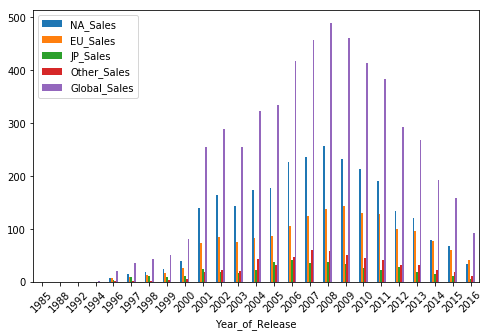

In [7]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

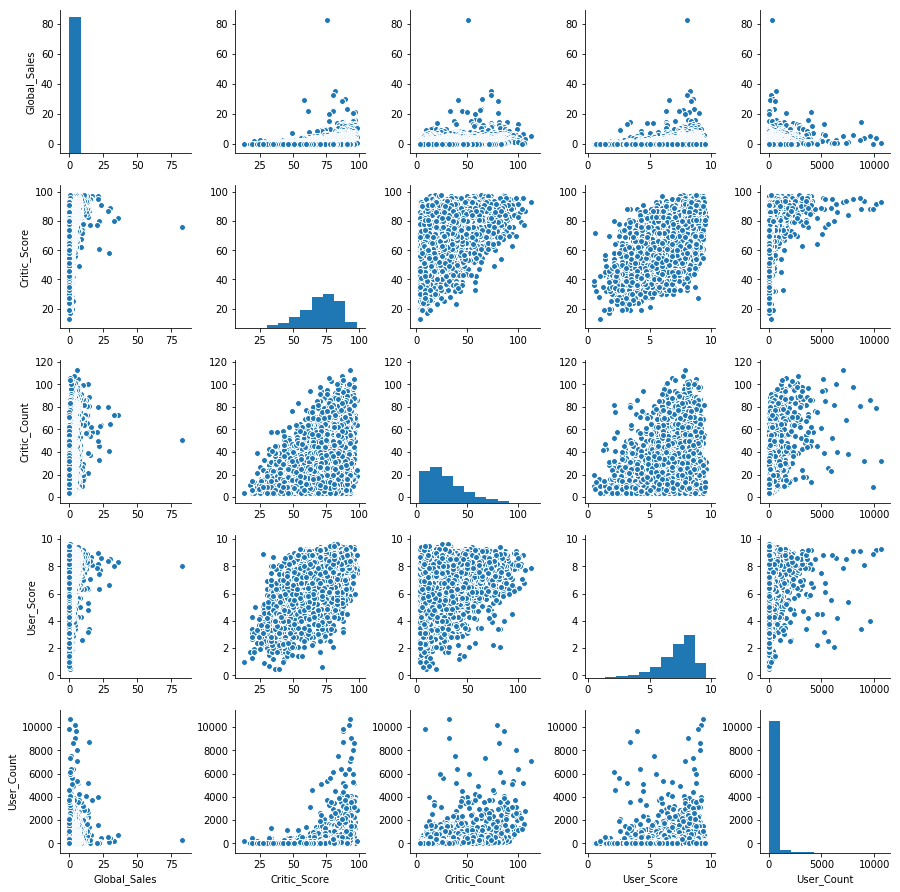

In [8]:
# Use seaborn to vizualization
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns.plot = sns.pairplot(df[cols])

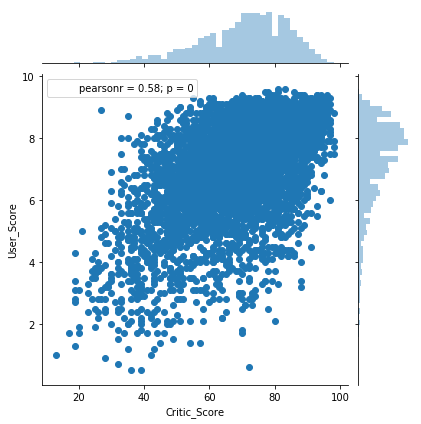

In [9]:
sns.jointplot(df['Critic_Score'], df['User_Score'])

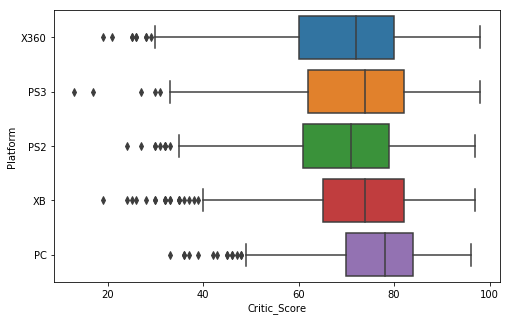

In [10]:
top_platforms = df.Platform.value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(y='Platform', x='Critic_Score',data=df[df.Platform.isin(top_platforms)], orient='h')

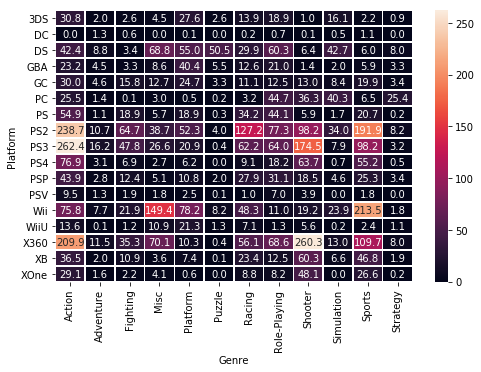

In [11]:
platform_genre_sales = df.pivot_table(index='Platform', columns='Genre',
                                     values='Global_Sales', aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt='.1f', linewidths=.5)

In [12]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [13]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
df.groupby('Year_of_Release')[['Name']].count())

In [14]:
years_df.columns = ['Global_Sales', 'Number_of_Games']

In [15]:
trace0 = go.Scatter(x=years_df.index, y=years_df.Global_Sales, name='Global Sales')
trace1 = go.Scatter(x=years_df.index, y=years_df.Number_of_Games, name='Number of game released')

In [16]:
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

# create Figure object and vizualize him
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [17]:
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
df.groupby('Platform')[['Name']].count())

In [18]:
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

In [19]:
trace0 = go.Bar(x=platforms_df.index, y=platforms_df.Global_Sales, name='Global Sales')
trace1 = go.Bar(x=platforms_df.index, y=platforms_df.Number_of_Games, name='Number of games released')

In [20]:
data = [trace0, trace1]
layout = {'title':'Share of platforms', 'xaxis':{'title':'platform'}}

In [21]:
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [22]:
data = []
for genre in df.Genre.unique():
    data.append(
    go.Box(y=df[df.Genre==genre].Critic_Score, name=genre))
iplot(data)

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse_open/master/data/telecom_churn.csv')

Text(0.5,1,'Client churn')

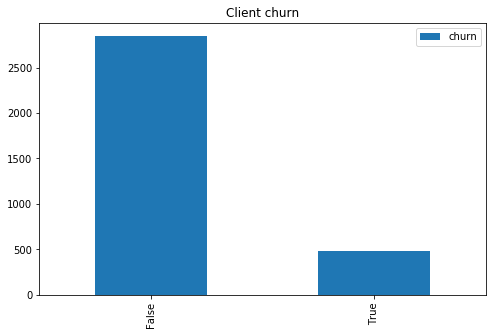

In [24]:
df['Churn'].value_counts().plot(kind='bar', label='churn')
plt.legend()
plt.title('Client churn')

In [25]:
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan', 'Area code'],
                     axis=1).corr()

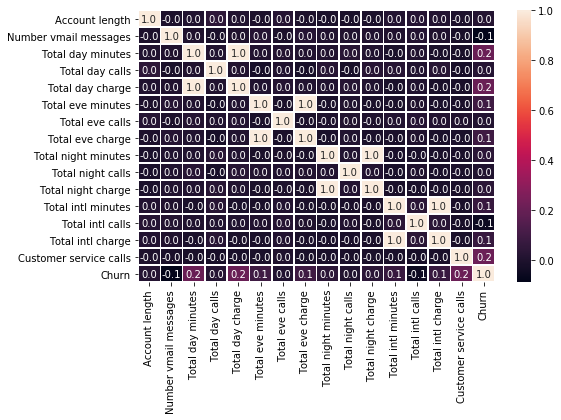

In [26]:
sns.heatmap(corr_matrix, annot=True, fmt='.1f', linewidths=.5)

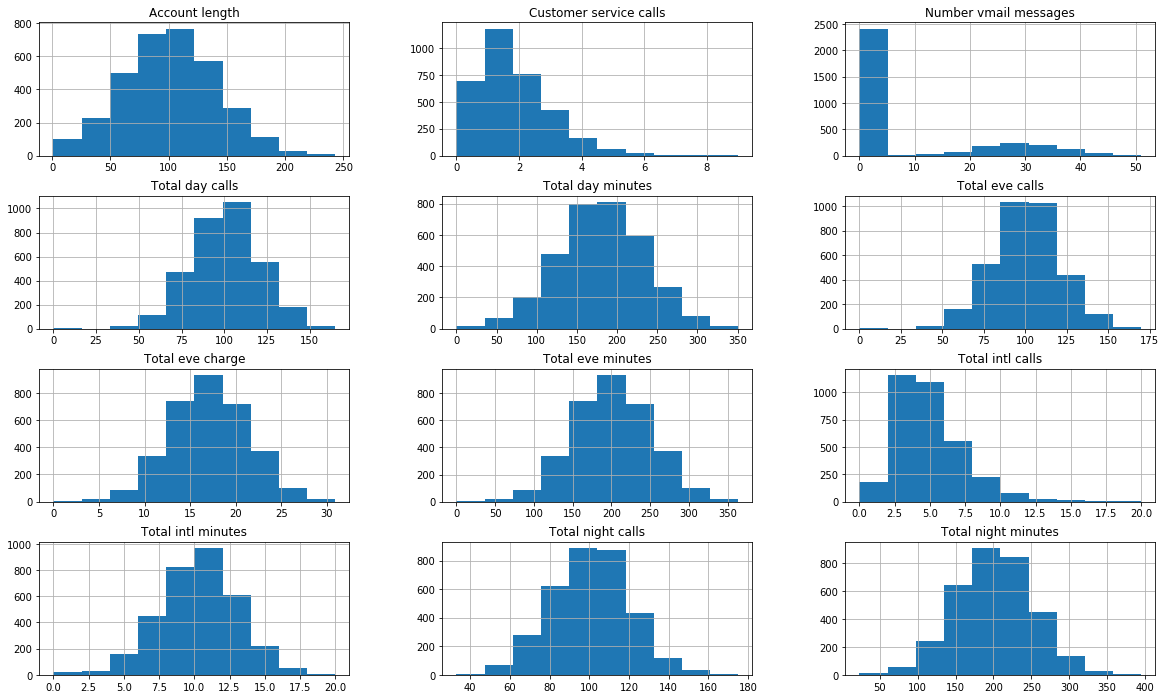

In [27]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan', 'Area code',
                      'Total day charge', 'Total ece charge', 'Total night charge',
                      'Total intl charge', 'Churn']))
df[features].hist(figsize=(20,12));

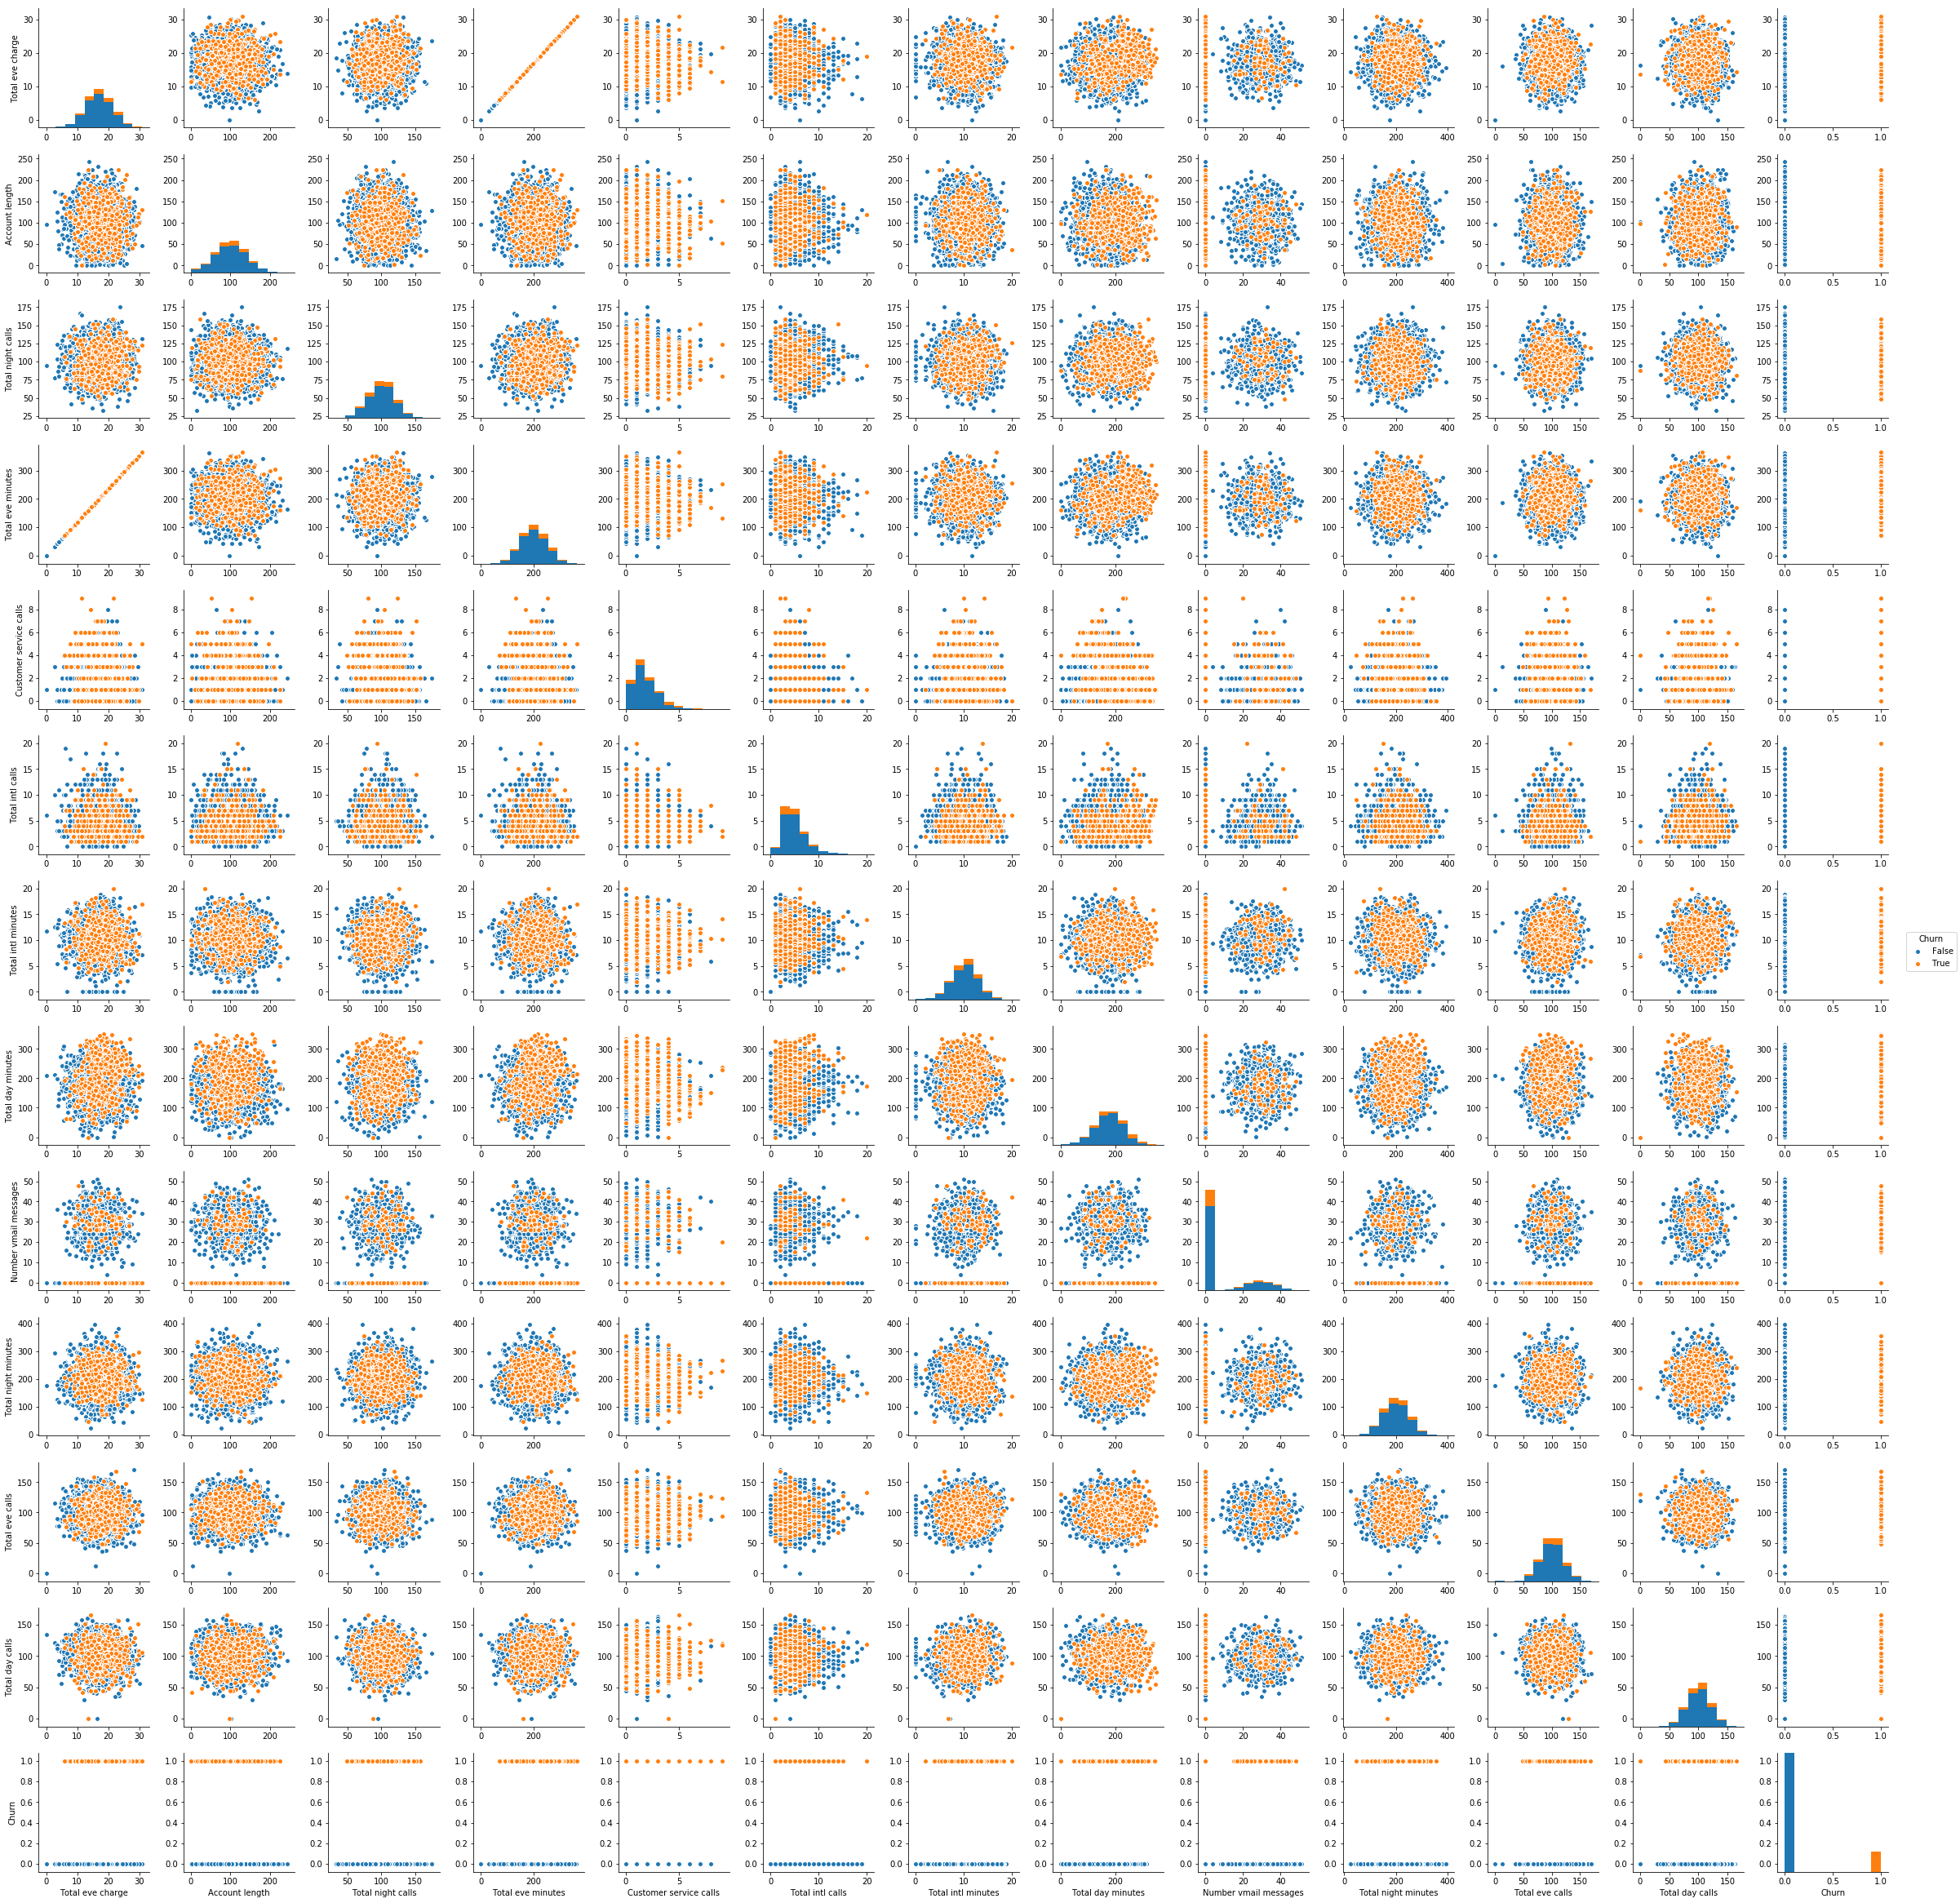

In [30]:
sns.pairplot(df[features + ['Churn']], hue='Churn')

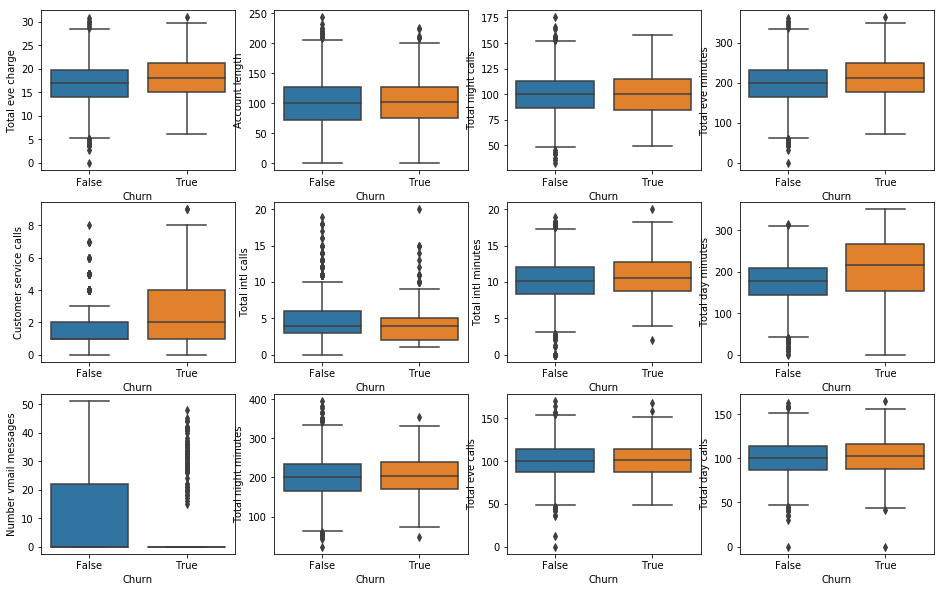

In [44]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='Churn', y=feat, data=df, ax=axes[int(idx / 4), idx % 4])
    axes[int(idx / 4), idx % 4].legend()
    axes[int(idx / 4), idx % 4].set_xlabel('Churn')
    axes[int(idx / 4), idx % 4].set_ylabel(feat);

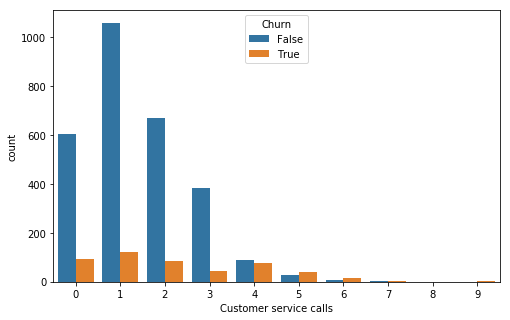

In [47]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)

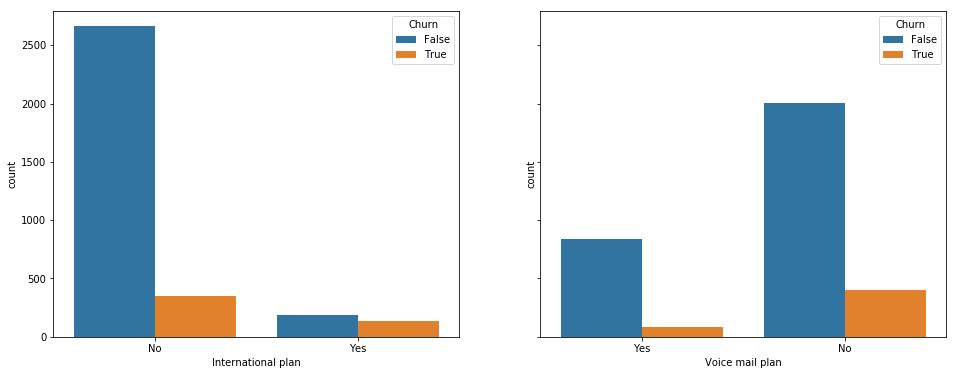

In [49]:
_, axes = plt.subplots(1,2, sharey=True, figsize=(16,6))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0])
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1])

In [58]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


In [60]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [63]:
# transfor our features to numeric and drop state
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = pd.factorize(X['International plan'])[0]
X['Voice mail plan'] = pd.factorize(X['Voice mail plan'])[0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

Wall time: 1min 41s


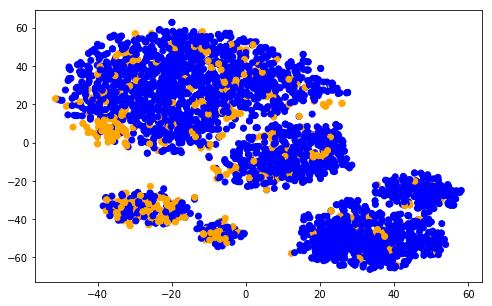

In [69]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
           c=df['Churn'].map({0: 'blue', 1: 'orange'}))

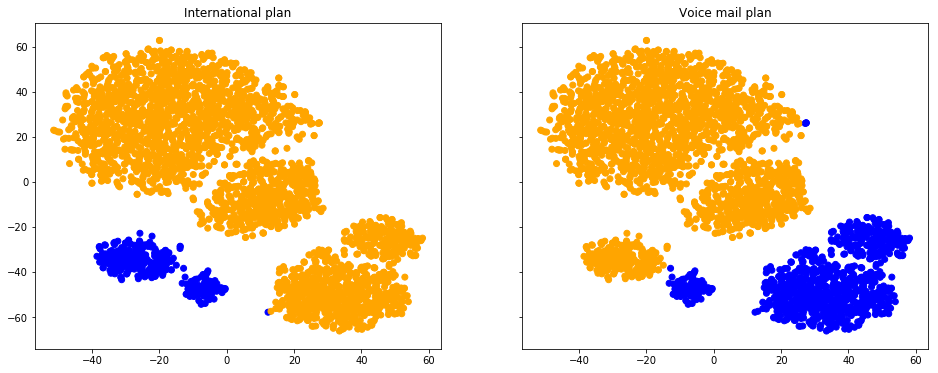

In [70]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

axes[0].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['International plan'].map({'Yes': 'blue', 'No': 'orange'}));
axes[1].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['Voice mail plan'].map({'Yes': 'blue', 'No': 'orange'}));
axes[0].set_title('International plan');
axes[1].set_title('Voice mail plan');